## Experiment 
#### AIM : k-Means Clustering Algorithm
##### To peform cluster the data using k-Means Clustering

#### DESCRIPTION:
${K}$-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable ${K}$. The algorithm works iteratively to assign each data point to one of ${K}$ groups based on the features that are provided. Data points are clustered based on feature similarity.
##### Algorithm :
```
1. First we initialize k points, called means, randomly.
2. We categorize each item to its closest mean(using Euclidean Distance) and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
3. We repeat the process for a given number of iterations and at the end, we have our clusters.
```

#### CODE and OUTPUT:

In [1]:
# Clustering of data using k-Means algorithm
# Required Libraries
import numpy as np
import pandas as pd
import math
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading data
iris = datasets.load_iris()
data = iris.data[:,:2]
target_classes = iris.target
data.shape, target_classes.shape

((150, 2), (150,))

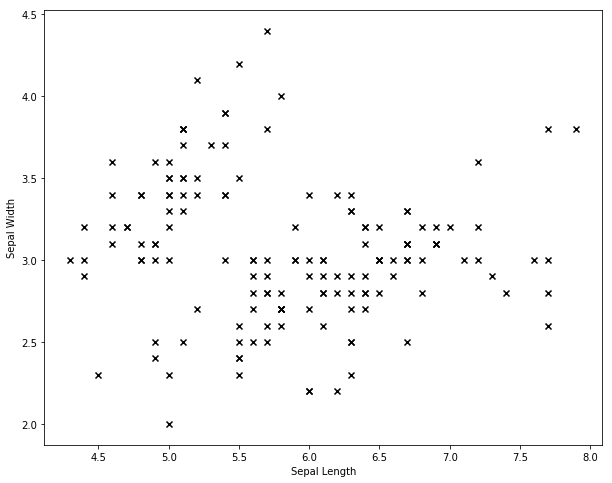

In [3]:
# Data Visualization
plt.figure(figsize=(10,8))
plt.scatter(data[:,0],data[:,1],marker='x',color='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [4]:
# Euclidean Distance between 2 datapoints
def euclideanDistance(a1,a2,length):
    distance = 0 
    for i in range(length):
        distance = distance + (a1[i]-a2[i])**2
    distance = math.sqrt(distance)
    return distance

euclideanDistance(data[0],data[1],len(data[0]))

0.5385164807134502

In [5]:
# Parameters
k=3 # no. of centroids
tol=0.001 # tolerance
max_iter=500 # max iterations

In [6]:
# Initializing Centroids to first k points in data
centroids = {}

for i in range(k):
    centroids[i] = data[i]

centroids

{0: array([5.1, 3.5]), 1: array([4.9, 3. ]), 2: array([4.7, 3.2])}

In [7]:
# Clustering of data into k clusters
for i in range(max_iter):
    # Initialising Clusters
    classifications = {}
    for j in range(k):
        classifications[j] = []
    
    # Fitting data
    for point in data:
        distances = [euclideanDistance(point,centroid,len(point)) for centroid in centroids.values()]
        classification = distances.index(min(distances))
        classifications[classification].append(point)
    
    # Updating centroids to mean of a cluster
    for classification in classifications:
        centroids[classification] = np.average(classifications[classification],axis=0)

[len(classifications[c]) for c in classifications]

[47, 53, 50]

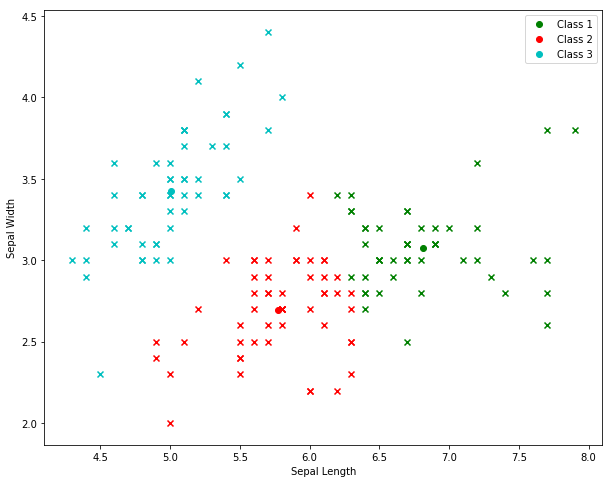

In [8]:
# Visualising Clustered Data
color = ['g','r','c','b','k']
plt.figure(figsize=(10,8))
for c in centroids:
    plt.scatter(centroids[c][0],centroids[c][1],marker='o',color=color[c])
    
for c in classifications:
    for point in classifications[c]:
        plt.scatter(point[0],point[1],marker='x',color=color[c])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(['Class %i'%(i+1) for i in classifications])
plt.show()

#### LEARNING OUTCOMES:
##### In this experiment, we learned about clustering of given data into k clusters using k-means algorithm.